In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import base64
import requests
import json 

In [2]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')
    
def get_base64_encoded_arr(arr):
    return base64.b64encode(np.reshape(arr, (480*640*3))).decode('utf-8')

def get_play_action(endpoint, n_cards, hand, deck, key=None):
    input_json = json.dumps({
        "n_cards": n_cards,
        "hand": get_base64_encoded_arr(hand),
        "deck": get_base64_encoded_arr(deck)
    })
    headers = { 'Content-Type':'application/json' }
    if key:
        headers['Authorization'] = f'Bearer {key}' # Only difference to local is to send the auth key
    predictions = requests.post(endpoint, input_json, headers = headers)
    p = predictions.json()
    print(str(p)+'\n')
    print(f'Hand:     {p[0]}')
    print(f'Deck:     {p[1]}')
    if p[2]:
        play = p[2][0]
        print(f'Score:    {play[0]}')
        print(f'Complete: {play[1]}')
        print(f'Words:    {[c[0] for c in play[2]]}')
        print(f'Pick up:  {p[2][1]}')
        print(f'Drop:     {p[2][2]}\n')
    else:
        print('No possible play for these cards')

In [3]:
def get_frame():
    for i in range(5): # grab a few frames to clear the buffer
        ret, frame = cap.read()
    frame = np.fliplr(np.flipud(frame))
    frame = frame[..., ::-1].copy()
    plt.imshow(frame)
    return frame

In [4]:
key = 'Aulgav1v1W177kh8idIdSw6uzWlo4amK'
endpoint = 'http://52.254.12.228/api/v1/service/quiddler-service2/score'

In [21]:
cap = cv2.VideoCapture(2)

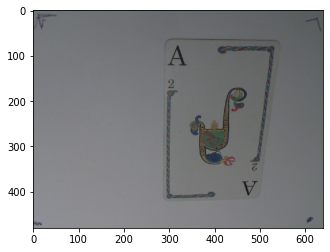

In [7]:
deck = get_frame()

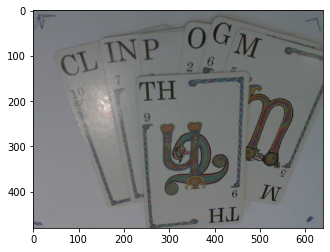

In [29]:
hand = get_frame()

In [30]:
get_play_action(endpoint, 7, hand, deck, key)

['cl/in/th/p/o/g/m', 'a', [[42, True, [['cl/o/th/in/g', [34, 5, ['cl', 'o', 'th', 'in', 'g']]], ['p/a', [8, 2, ['p', 'a']]]]], 'a', 'm']]

Hand:     cl/in/th/p/o/g/m
Deck:     a
Score:    42
Complete: True
Words:    ['cl/o/th/in/g', 'p/a']
Pick up:  a
Drop:     m



In [31]:
cap.release()